# Pothole Detection using YOLOv11

We carry out the following training experiments using YOLOv11 on the pothole dataset in this notebook:
* YOLOv11s model fixed resolution training.
* YOLOv11s model multi-resolution training.
* YOLOv11m model fixed resolution training.
* YOLOv11m model multi-resolution training.
* YOLOv11 model fixed resolution training.
* YOLOv11 model multi-resolution training.

In [ ]:
!nvidia-smi

Sun Dec 28 20:16:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   32C    P0             55W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

## Install requirements

In [ ]:
!pip install ultralytics torch torchvision opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00


In [2]:
import torch
from ultralytics import YOLO
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

print("YOLOv11 imported successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.9.0+cu126
CUDA available: True
GPU: NVIDIA A100-SXM4-40GB
YOLOv11 imported successfully!


## Download and Extract the Dataset

In [3]:
!wget -nc https://learnopencv.s3.us-west-2.amazonaws.com/pothole_dataset.zip
!unzip -q -o pothole_dataset.zip
!ls -lah pothole_dataset

--2025-12-28 20:22:10--  https://learnopencv.s3.us-west-2.amazonaws.com/pothole_dataset.zip
Resolving learnopencv.s3.us-west-2.amazonaws.com (learnopencv.s3.us-west-2.amazonaws.com)... 3.5.84.177, 52.218.218.225, 3.5.81.249, ...
Connecting to learnopencv.s3.us-west-2.amazonaws.com (learnopencv.s3.us-west-2.amazonaws.com)|3.5.84.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439133609 (419M) [application/zip]
Saving to: ‘pothole_dataset.zip’

pothole_dataset.zip 100%[===================>] 418.79M  12.6MB/s    in 30s     

2025-12-28 20:22:40 (14.2 MB/s) - ‘pothole_dataset.zip’ saved [439133609/439133609]

total 16K
drwxrwxr-x 4 root root 4.0K Aug 18  2022 .
drwxr-xr-x 1 root root 4.0K Dec 28 20:22 ..
drwxrwxr-x 5 root root 4.0K Aug 18  2022 images
drwxrwxr-x 5 root root 4.0K Aug 18  2022 labels


## Data config (Ultralytics YAML)

In [4]:
%%writefile pothole.yaml
path: pothole_dataset
train: images/train
val: images/valid
test: images/test

names:
  0: pothole

Writing pothole.yaml


## YOLOv11s Model Fixed Resolution

In [5]:
#Training
model = YOLO("yolo11s.pt")

results = model.train(
    data="pothole.yaml",
    epochs=100,
    imgsz=640,
    batch=64,
    device=0,
    workers=8,
    project="runs_yolo11",
    name="pothole_yolo11s_fixed"
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolo11s_fixed, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [6]:
# Validation
model = YOLO("runs_yolo11/pothole_yolo11s_fixed/weights/best.pt")
metrics = model.val(
    data="pothole.yaml",
    split="test",
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11s_fixed_val"
)

print(metrics)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2296.2±902.3 MB/s, size: 264.2 KB)
val: Scanning /content/pothole_dataset/labels/test... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 1.5Kit/s 0.1s
val: New cache created: /content/pothole_dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.8it/s 1.7s
                   all        118        304      0.782      0.568      0.609      0.364
Speed: 1.4ms preprocess, 6.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11s_fixed_val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metri

In [ ]:
#Validation on test dataset
model = YOLO("runs_yolo11/pothole_yolo11s_fixed/weights/best.pt")

metrics_test_11s_fixed = model.val(
    data="pothole.yaml",
    split="test",                
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11s_fixed_test",
    plots=True
)

print(metrics_test_11s_fixed.results_dict)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2088.9±924.2 MB/s, size: 135.2 KB)
val: Scanning /content/pothole_dataset/labels/test.cache... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 248.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.9it/s 1.6s
                   all        118        304      0.782      0.568      0.609      0.364
Speed: 1.5ms preprocess, 1.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11s_fixed_test
{'metrics/precision(B)': 0.7824113850506782, 'metrics/recall(B)': 0.5677660047398558, 'metrics/mAP50(B)': 0.6094994322528924, 'metrics/mAP50-95(B)': 0.3642210596060417, 'fitness': 0.3642210596060417}


In [ ]:
# Predict on test dataset
model.predict(
    source="pothole_dataset/images/test",
    imgsz=640,
    conf=0.25,
    device=0,
    save=True,
    project="runs_yolo11",
    name="pothole_yolo11s_fixed_pred_all"
)



image 1/118 /content/pothole_dataset/images/test/G0010124.JPG: 480x640 1 pothole, 86.3ms
image 2/118 /content/pothole_dataset/images/test/G0010760.JPG: 480x640 2 potholes, 10.1ms
image 3/118 /content/pothole_dataset/images/test/G0010770.JPG: 480x640 3 potholes, 9.8ms
image 4/118 /content/pothole_dataset/images/test/G0011427.JPG: 480x640 2 potholes, 10.1ms
image 5/118 /content/pothole_dataset/images/test/G0011555.JPG: 480x640 1 pothole, 9.9ms
image 6/118 /content/pothole_dataset/images/test/G0011563.JPG: 480x640 3 potholes, 9.8ms
image 7/118 /content/pothole_dataset/images/test/G0011613.JPG: 480x640 (no detections), 9.5ms
image 8/118 /content/pothole_dataset/images/test/G0011621.JPG: 480x640 1 pothole, 9.3ms
image 9/118 /content/pothole_dataset/images/test/G0011759.JPG: 480x640 1 pothole, 9.5ms
image 10/118 /content/pothole_dataset/images/test/G0011764.JPG: 480x640 1 pothole, 9.2ms
image 11/118 /content/pothole_dataset/images/test/G0011766.JPG: 480x640 2 potholes, 9.3ms
image 12/118 /c

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[230, 202, 172],
         [231, 203, 173],
         [231, 203, 173],
         ...,
         [181, 138, 105],
         [182, 139, 106],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [181, 138, 105],
         [183, 140, 107],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [180, 139, 106],
         [184, 141, 108],
         [183, 140, 107]],
 
        ...,
 
        [[ 38,  38,  52],
         [ 37,  37,  51],
         [ 40,  40,  54],
         ...,
         [ 57,  46,  86],
         [ 57,  46,  86],
         [ 55,  44,  84]],
 
        [[ 37,  37,  51],
         [ 38,  38,  52],
         [ 39,  39,  53],
         ...,
         [ 56,  4

## YOLOv11s Model multi Resolution

In [22]:
#Training
model = YOLO("yolo11s.pt")

results = model.train(
    data="pothole.yaml",
    epochs=100,
    imgsz=640,
    batch=64,
    device=0,
    workers=8,
    multi_scale=True,
    project="runs_yolo11",
    name="pothole_yolo11s_multiscale"
)

results


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=True, name=pothole_yolo11s_multiscale, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7db840bbc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [23]:
# Validation

model = YOLO("runs_yolo11/pothole_yolo11s_multiscale/weights/best.pt")
metrics = model.val(
    data="pothole.yaml",
    split="test",
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11s_multiscale_val"
)

print(metrics)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2961.5±1472.6 MB/s, size: 300.8 KB)
val: Scanning /content/pothole_dataset/labels/test.cache... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 245.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 5.1it/s 1.6s
                   all        118        304       0.74      0.523      0.611      0.361
Speed: 1.3ms preprocess, 1.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11s_multiscale_val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7dab345340>
curves: 

In [ ]:
#Validation on test dataset

model = YOLO("runs_yolo11/pothole_yolo11s_multiscale/weights/best.pt")
metrics_test_11s_multi = model.val(
    data="pothole.yaml",
    split="test",                 # ✅ TEST split
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11s_multiscale_test",
    plots=True
)

print(metrics_test_11s_multi.results_dict)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3282.9±1078.6 MB/s, size: 278.0 KB)
val: Scanning /content/pothole_dataset/labels/test.cache... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 250.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 5.1it/s 1.6s
                   all        118        304       0.74      0.523      0.611      0.361
Speed: 1.4ms preprocess, 1.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11s_multiscale_test
{'metrics/precision(B)': 0.7400581983490082, 'metrics/recall(B)': 0.5230263157894737, 'metrics/mAP50(B)': 0.6107888523776397, 'metrics/mAP50-95(B)': 0.3609113206020018, 'fitness': 0.3609113206020018}


In [ ]:
#Prediction on test dataset 

model = YOLO("runs_yolo11/pothole_yolo11s_multiscale/weights/best.pt")
model.predict(
    source="pothole_dataset/images/test",
    imgsz=640,
    conf=0.25,
    device=0,
    save=True,
    project="runs_yolo11",
    name="pothole_yolo11s_multiscale_pred_all"
)


image 1/118 /content/pothole_dataset/images/test/G0010124.JPG: 480x640 1 pothole, 11.6ms
image 2/118 /content/pothole_dataset/images/test/G0010760.JPG: 480x640 1 pothole, 9.6ms
image 3/118 /content/pothole_dataset/images/test/G0010770.JPG: 480x640 3 potholes, 9.7ms
image 4/118 /content/pothole_dataset/images/test/G0011427.JPG: 480x640 (no detections), 9.5ms
image 5/118 /content/pothole_dataset/images/test/G0011555.JPG: 480x640 1 pothole, 11.3ms
image 6/118 /content/pothole_dataset/images/test/G0011563.JPG: 480x640 2 potholes, 9.5ms
image 7/118 /content/pothole_dataset/images/test/G0011613.JPG: 480x640 1 pothole, 9.6ms
image 8/118 /content/pothole_dataset/images/test/G0011621.JPG: 480x640 1 pothole, 9.6ms
image 9/118 /content/pothole_dataset/images/test/G0011759.JPG: 480x640 2 potholes, 9.7ms
image 10/118 /content/pothole_dataset/images/test/G0011764.JPG: 480x640 1 pothole, 9.5ms
image 11/118 /content/pothole_dataset/images/test/G0011766.JPG: 480x640 (no detections), 9.5ms
image 12/118

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[230, 202, 172],
         [231, 203, 173],
         [231, 203, 173],
         ...,
         [181, 138, 105],
         [182, 139, 106],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [181, 138, 105],
         [183, 140, 107],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [180, 139, 106],
         [184, 141, 108],
         [183, 140, 107]],
 
        ...,
 
        [[ 38,  38,  52],
         [ 37,  37,  51],
         [ 40,  40,  54],
         ...,
         [ 57,  46,  86],
         [ 57,  46,  86],
         [ 55,  44,  84]],
 
        [[ 37,  37,  51],
         [ 38,  38,  52],
         [ 39,  39,  53],
         ...,
         [ 56,  4

## YOLOv11m Model multi Resolution

In [ ]:
#Training
model = YOLO("yolo11m.pt")
model.train(
    data="pothole.yaml",
    epochs=100,
    imgsz=640,
    batch=32,
    device=0,
    workers=8,
    multi_scale=True,
    project="runs_yolo11",
    name="pothole_yolo11m_multiscale"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=True, name=pothole_yolo11m_multiscale, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7dae38e630>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Validation
model = YOLO("runs_yolo11/pothole_yolo11m_multiscale/weights/best.pt")
metrics = model.val(
    data="pothole.yaml",
    split="val",
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11m_multiscale_val",
    save_json=True,
    plots=True
)

print(metrics)
print(metrics.results_dict)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3346.4±895.9 MB/s, size: 289.6 KB)
val: Scanning /content/pothole_dataset/labels/valid.cache... 401 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 401/401 962.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 6.7it/s 3.9s
                   all        401       1034      0.732      0.574      0.623      0.329
Speed: 0.9ms preprocess, 4.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Saving /content/runs_yolo11/pothole_yolo11m_multiscale_val/predictions.json...
Results saved to /content/runs_yolo11/pothole_yolo11m_multiscale_val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_mat

In [ ]:
# Validation on test dataset

model = YOLO("runs_yolo11/pothole_yolo11m_multiscale/weights/best.pt")

metrics_test = model.val(
    data="pothole.yaml",
    split="test",         # ✅ test split
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11m_multiscale_test",
    save_json=True,
    plots=True
)

print(metrics_test)
print(metrics_test.results_dict)



Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3381.6±1503.1 MB/s, size: 235.6 KB)
val: Scanning /content/pothole_dataset/labels/test.cache... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 200.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.4it/s 1.8s
                   all        118        304      0.666      0.579      0.592      0.351
Speed: 1.3ms preprocess, 3.8ms inference, 0.0ms loss, 4.4ms postprocess per image
Saving /content/runs_yolo11/pothole_yolo11m_multiscale_test/predictions.json...
Results saved to /content/runs_yolo11/pothole_yolo11m_multiscale_test
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_mat

In [ ]:
#Prediction on test dataset
model = YOLO("runs_yolo11/pothole_yolo11m_multiscale/weights/best.pt")

pred = model.predict(
    source="pothole_dataset/images/test",
    imgsz=640,
    conf=0.25,                 # change later after threshold tuning
    device=0,
    save=True,
    save_txt=False,
    save_conf=True,
    project="runs_yolo11",
    name="pothole_yolo11m_multiscale_pred_all"
)

pred


image 1/118 /content/pothole_dataset/images/test/G0010124.JPG: 480x640 1 pothole, 56.4ms
image 2/118 /content/pothole_dataset/images/test/G0010760.JPG: 480x640 2 potholes, 13.0ms
image 3/118 /content/pothole_dataset/images/test/G0010770.JPG: 480x640 2 potholes, 12.9ms
image 4/118 /content/pothole_dataset/images/test/G0011427.JPG: 480x640 (no detections), 13.0ms
image 5/118 /content/pothole_dataset/images/test/G0011555.JPG: 480x640 1 pothole, 12.9ms
image 6/118 /content/pothole_dataset/images/test/G0011563.JPG: 480x640 3 potholes, 12.3ms
image 7/118 /content/pothole_dataset/images/test/G0011613.JPG: 480x640 (no detections), 14.7ms
image 8/118 /content/pothole_dataset/images/test/G0011621.JPG: 480x640 1 pothole, 12.9ms
image 9/118 /content/pothole_dataset/images/test/G0011759.JPG: 480x640 (no detections), 12.0ms
image 10/118 /content/pothole_dataset/images/test/G0011764.JPG: 480x640 1 pothole, 12.0ms
image 11/118 /content/pothole_dataset/images/test/G0011766.JPG: 480x640 (no detections)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[230, 202, 172],
         [231, 203, 173],
         [231, 203, 173],
         ...,
         [181, 138, 105],
         [182, 139, 106],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [181, 138, 105],
         [183, 140, 107],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [180, 139, 106],
         [184, 141, 108],
         [183, 140, 107]],
 
        ...,
 
        [[ 38,  38,  52],
         [ 37,  37,  51],
         [ 40,  40,  54],
         ...,
         [ 57,  46,  86],
         [ 57,  46,  86],
         [ 55,  44,  84]],
 
        [[ 37,  37,  51],
         [ 38,  38,  52],
         [ 39,  39,  53],
         ...,
         [ 56,  4

## YOLOv11m Model fixed Resolution

In [ ]:
#Training
model = YOLO("yolo11m.pt")
model.train(
    data="pothole.yaml",
    epochs=100,
    imgsz=640,
    batch=64,
    device=0,
    workers=8,
    project="runs_yolo11",
    name="pothole_yolo11m_fixed"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolo11m_fixed, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7dab8808c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#Validation
model = YOLO("runs_yolo11/pothole_yolo11m_fixed/weights/best.pt")

metrics_val = model.val(
    data="pothole.yaml",
    split="val",
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11m_fixed_val",
    plots=True
)

print(metrics_val.results_dict)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3683.3±929.7 MB/s, size: 311.4 KB)
val: Scanning /content/pothole_dataset/labels/valid.cache... 401 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 401/401 926.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 7.7it/s 3.4s
                   all        401       1034      0.749      0.558      0.633      0.335
Speed: 0.8ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11m_fixed_val
{'metrics/precision(B)': 0.7494275546213429, 'metrics/recall(B)': 0.5582558620982584, 'metrics/mAP50(B)': 0.6334717371813576, 'metrics/mAP50-95(B)': 0.33540526475315663, 'fitness': 0.33540526475315663}


In [ ]:
# Validation on test dataset
metrics_test = model.val(
    data="pothole.yaml",
    split="test",
    imgsz=640,
    device=0,
    project="runs_yolo11",
    name="pothole_yolo11m_fixed_test",
    plots=True
)

print(metrics_test.results_dict)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1749.0±196.3 MB/s, size: 221.6 KB)
val: Scanning /content/pothole_dataset/labels/test.cache... 118 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 118/118 252.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.8it/s 1.7s
                   all        118        304      0.701      0.579       0.63      0.377
Speed: 1.4ms preprocess, 2.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/runs_yolo11/pothole_yolo11m_fixed_test
{'metrics/precision(B)': 0.7014569671639538, 'metrics/recall(B)': 0.5789473684210527, 'metrics/mAP50(B)': 0.6302228839053088, 'metrics/mAP50-95(B)': 0.3766001303761519, 'fitness': 0.3766001303761519}


In [ ]:
#Prediction on test dataset
model.predict(
    source="pothole_dataset/images/test",
    imgsz=640,
    conf=0.25,   # tune later for safety
    device=0,
    save=True,
    project="runs_yolo11",
    name="pothole_yolo11m_fixed_pred_all"
)



image 1/118 /content/pothole_dataset/images/test/G0010124.JPG: 480x640 1 pothole, 13.9ms
image 2/118 /content/pothole_dataset/images/test/G0010760.JPG: 480x640 1 pothole, 12.3ms
image 3/118 /content/pothole_dataset/images/test/G0010770.JPG: 480x640 1 pothole, 12.4ms
image 4/118 /content/pothole_dataset/images/test/G0011427.JPG: 480x640 1 pothole, 13.0ms
image 5/118 /content/pothole_dataset/images/test/G0011555.JPG: 480x640 1 pothole, 12.3ms
image 6/118 /content/pothole_dataset/images/test/G0011563.JPG: 480x640 2 potholes, 12.2ms
image 7/118 /content/pothole_dataset/images/test/G0011613.JPG: 480x640 (no detections), 11.9ms
image 8/118 /content/pothole_dataset/images/test/G0011621.JPG: 480x640 2 potholes, 12.8ms
image 9/118 /content/pothole_dataset/images/test/G0011759.JPG: 480x640 1 pothole, 11.7ms
image 10/118 /content/pothole_dataset/images/test/G0011764.JPG: 480x640 1 pothole, 12.1ms
image 11/118 /content/pothole_dataset/images/test/G0011766.JPG: 480x640 1 pothole, 11.9ms
image 12/1

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[230, 202, 172],
         [231, 203, 173],
         [231, 203, 173],
         ...,
         [181, 138, 105],
         [182, 139, 106],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [181, 138, 105],
         [183, 140, 107],
         [182, 139, 106]],
 
        [[231, 203, 173],
         [232, 204, 174],
         [232, 204, 174],
         ...,
         [180, 139, 106],
         [184, 141, 108],
         [183, 140, 107]],
 
        ...,
 
        [[ 38,  38,  52],
         [ 37,  37,  51],
         [ 40,  40,  54],
         ...,
         [ 57,  46,  86],
         [ 57,  46,  86],
         [ 55,  44,  84]],
 
        [[ 37,  37,  51],
         [ 38,  38,  52],
         [ 39,  39,  53],
         ...,
         [ 56,  4

## Matrices comaprison on all 4 runs (val and test)

In [79]:
from ultralytics import YOLO
from pathlib import Path
import pandas as pd

# ---- paths (edit if yours differ) ----
PROJECT = "runs_yolo11"
DATA = "pothole.yaml"
IMG_SIZE = 640
DEVICE = 0

runs = [
    ("yolo11s", "fixed",      f"{PROJECT}/pothole_yolo11s_fixed/weights/best.pt"),
    ("yolo11s", "multiscale", f"{PROJECT}/pothole_yolo11s_multiscale/weights/best.pt"),
    ("yolo11m", "fixed",      f"{PROJECT}/pothole_yolo11m_fixed/weights/best.pt"),
    ("yolo11m", "multiscale", f"{PROJECT}/pothole_yolo11m_multiscale/weights/best.pt"),
]

rows = []

for model_name, mode, w in runs:
    w = str(w)
    print(f"\n=== {model_name} | {mode} | weights: {w} ===")
    model = YOLO(w)

    # VAL split
    mv = model.val(
        data=DATA, split="val", imgsz=IMG_SIZE, device=DEVICE,
        project=PROJECT, name=f"compare_{model_name}_{mode}_val", plots=True
    )
    dval = mv.results_dict
    rows.append({
        "model": model_name, "mode": mode, "split": "val",
        "precision": dval.get("metrics/precision(B)"),
        "recall": dval.get("metrics/recall(B)"),
        "mAP50": dval.get("metrics/mAP50(B)"),
        "mAP50-95": dval.get("metrics/mAP50-95(B)"),
        "fitness": dval.get("fitness"),
    })

    # TEST split
    mt = model.val(
        data=DATA, split="test", imgsz=IMG_SIZE, device=DEVICE,
        project=PROJECT, name=f"compare_{model_name}_{mode}_test", plots=True
    )
    dtest = mt.results_dict
    rows.append({
        "model": model_name, "mode": mode, "split": "test",
        "precision": dtest.get("metrics/precision(B)"),
        "recall": dtest.get("metrics/recall(B)"),
        "mAP50": dtest.get("metrics/mAP50(B)"),
        "mAP50-95": dtest.get("metrics/mAP50-95(B)"),
        "fitness": dtest.get("fitness"),
    })

df_metrics = pd.DataFrame(rows)
df_metrics["run"] = df_metrics["model"] + "_" + df_metrics["mode"]
df_metrics.to_csv(f"{PROJECT}/compare_metrics_val_test.csv", index=False)

df_metrics



=== yolo11s | fixed | weights: runs_yolo11/pothole_yolo11s_fixed/weights/best.pt ===
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3080.8±1676.0 MB/s, size: 203.7 KB)
val: Scanning /content/pothole_dataset/labels/valid.cache... 401 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 401/401 903.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 8.1it/s 3.2s
                   all        401       1034      0.747      0.567      0.626      0.333
Speed: 0.8ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/runs_yolo11/compare_yolo11s_fixed_val
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read:

,model,mode,split,precision,recall,mAP50,mAP50-95,fitness,run
0,yolo11s,fixed,val,0.747227,0.566731,0.626261,0.333452,0.333452,yolo11s_fixed
1,yolo11s,fixed,test,0.782411,0.567766,0.609499,0.364221,0.364221,yolo11s_fixed
2,yolo11s,multiscale,val,0.697241,0.568665,0.614701,0.327319,0.327319,yolo11s_multiscale
3,yolo11s,multiscale,test,0.740058,0.523026,0.610789,0.360911,0.360911,yolo11s_multiscale
4,yolo11m,fixed,val,0.749428,0.558256,0.633472,0.335405,0.335405,yolo11m_fixed
5,yolo11m,fixed,test,0.701457,0.578947,0.630223,0.376600,0.376600,yolo11m_fixed
6,yolo11m,multiscale,val,0.731852,0.573501,0.623162,0.329433,0.329433,yolo11m_multiscale
7,yolo11m,multiscale,test,0.666312,0.578947,0.591747,0.350552,0.350552,yolo11m_multiscale


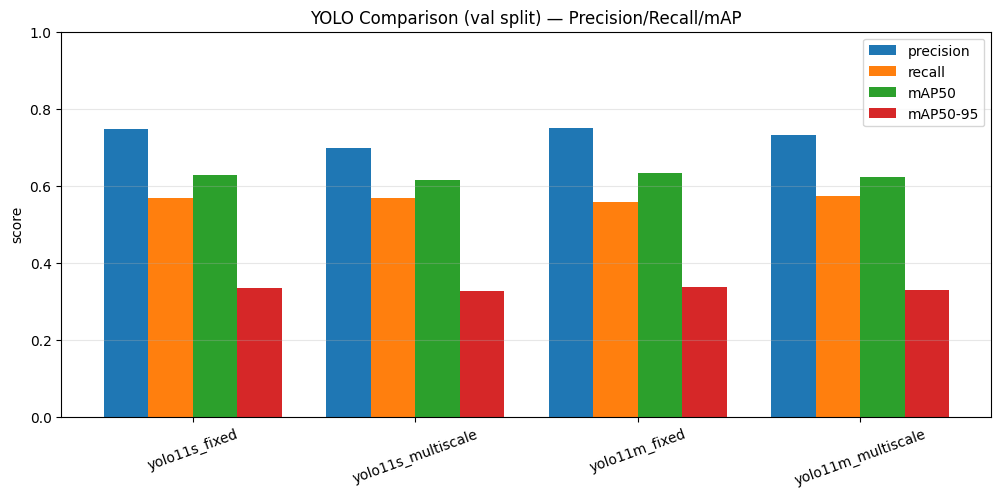

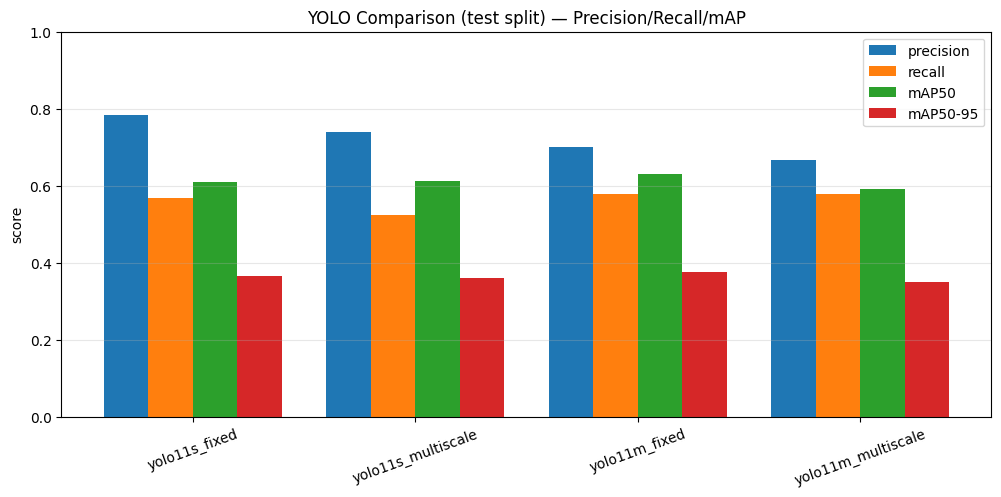

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("runs_yolo11/compare_metrics_val_test.csv")

metrics = ["precision", "recall", "mAP50", "mAP50-95"]
splits = ["val", "test"]
runs_order = ["yolo11s_fixed", "yolo11s_multiscale", "yolo11m_fixed", "yolo11m_multiscale"]

def plot_split(split_name):
    sub = df[df["split"] == split_name].copy()
    sub["run"] = sub["model"] + "_" + sub["mode"]
    sub = sub.set_index("run").reindex(runs_order).reset_index()

    x = np.arange(len(runs_order))
    width = 0.20

    plt.figure(figsize=(12, 5))
    for i, m in enumerate(metrics):
        plt.bar(x + (i - 1.5)*width, sub[m].values, width, label=m)

    plt.xticks(x, runs_order, rotation=20)
    plt.ylim(0, 1.0)
    plt.title(f"YOLO Comparison ({split_name} split) — Precision/Recall/mAP")
    plt.ylabel("score")
    plt.legend()
    plt.grid(True, axis="y", alpha=0.3)
    plt.show()

plot_split("val")
plot_split("test")


## Comaprison on number of potholes detection on test dataset for all runs 

In [81]:
from ultralytics import YOLO
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT = "runs_yolo11"
TEST_DIR = "pothole_dataset/images/test"
IMG_SIZE = 640
DEVICE = 0

# choose conf threshold for counting (important!)
CONF = 0.25
IOU_NMS = 0.7

runs = [
    ("yolo11s_fixed",      f"{PROJECT}/pothole_yolo11s_fixed/weights/best.pt"),
    ("yolo11s_multiscale", f"{PROJECT}/pothole_yolo11s_multiscale/weights/best.pt"),
    ("yolo11m_fixed",      f"{PROJECT}/pothole_yolo11m_fixed/weights/best.pt"),
    ("yolo11m_multiscale", f"{PROJECT}/pothole_yolo11m_multiscale/weights/best.pt"),
]

image_paths = sorted([p for p in Path(TEST_DIR).glob("*") if p.suffix.lower() in [".jpg", ".jpeg", ".png"]])
print("Test images:", len(image_paths))

rows = []
for run_name, w in runs:
    model = YOLO(w)
    total_boxes = 0
    images_with_det = 0

    # stream=True avoids holding everything in RAM
    for r in model.predict(
        source=[str(p) for p in image_paths],
        imgsz=IMG_SIZE, conf=CONF, iou=IOU_NMS,
        device=DEVICE, save=False, stream=True, verbose=False
    ):
        n = 0 if r.boxes is None else len(r.boxes)
        total_boxes += n
        if n > 0:
            images_with_det += 1

    rows.append({
        "run": run_name,
        "total_detections": total_boxes,
        "images_with_>=1_det": images_with_det,
        "avg_det_per_image": total_boxes / max(1, len(image_paths)),
        "conf": CONF
    })

df_pred = pd.DataFrame(rows)
df_pred.to_csv(f"{PROJECT}/compare_predict_counts_test.csv", index=False)
df_pred


Test images: 118


,run,total_detections,images_with_>=1_det,avg_det_per_image,conf
0,yolo11s_fixed,282,109,2.389831,0.25
1,yolo11s_multiscale,254,108,2.152542,0.25
2,yolo11m_fixed,246,105,2.084746,0.25
3,yolo11m_multiscale,258,102,2.186441,0.25


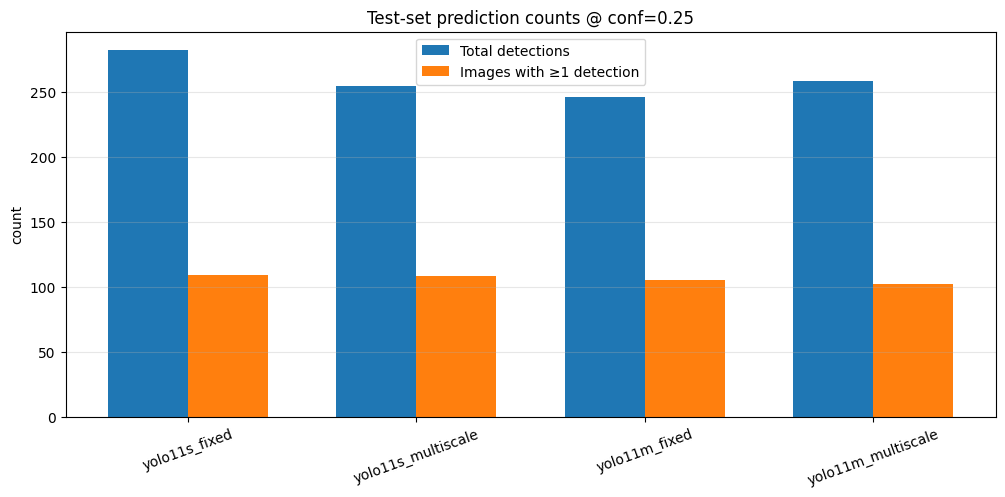

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = pd.read_csv("runs_yolo11/compare_predict_counts_test.csv")
order = ["yolo11s_fixed", "yolo11s_multiscale", "yolo11m_fixed", "yolo11m_multiscale"]
dfp = dfp.set_index("run").reindex(order).reset_index()

x = np.arange(len(dfp))
width = 0.35

plt.figure(figsize=(12,5))
plt.bar(x - width/2, dfp["total_detections"], width, label="Total detections")
plt.bar(x + width/2, dfp["images_with_>=1_det"], width, label="Images with ≥1 detection")
plt.xticks(x, dfp["run"], rotation=20)
plt.title(f"Test-set prediction counts @ conf={dfp['conf'].iloc[0]}")
plt.ylabel("count")
plt.legend()
plt.grid(True, axis="y", alpha=0.3)
plt.show()


In [83]:
from ultralytics import YOLO
from pathlib import Path
import pandas as pd
import numpy as np

PROJECT = "runs_yolo11"
TEST_DIR = "pothole_dataset/images/test"
IMG_SIZE = 640
DEVICE = 0

CONF = 0.25      # choose your operating threshold
IOU_NMS = 0.7

runs = [
    ("yolo11s_fixed",      f"{PROJECT}/pothole_yolo11s_fixed/weights/best.pt"),
    ("yolo11s_multiscale", f"{PROJECT}/pothole_yolo11s_multiscale/weights/best.pt"),
    ("yolo11m_fixed",      f"{PROJECT}/pothole_yolo11m_fixed/weights/best.pt"),
    ("yolo11m_multiscale", f"{PROJECT}/pothole_yolo11m_multiscale/weights/best.pt"),
]

image_paths = sorted([p for p in Path(TEST_DIR).glob("*") if p.suffix.lower() in [".jpg", ".jpeg", ".png"]])
print("Test images:", len(image_paths))

# dataframe keyed by image
df_counts = pd.DataFrame({
    "image": [p.name for p in image_paths],
    "path": [str(p) for p in image_paths],
})

for run_name, w in runs:
    print(f"\nCounting detections for: {run_name}")
    model = YOLO(w)

    counts = []
    # stream=True gives results sequentially (low memory)
    for r in model.predict(
        source=[str(p) for p in image_paths],
        imgsz=IMG_SIZE,
        conf=CONF,
        iou=IOU_NMS,
        device=DEVICE,
        save=False,
        stream=True,
        verbose=False
    ):
        n = 0 if r.boxes is None else len(r.boxes)
        counts.append(n)

    df_counts[run_name] = counts

# save
out_csv = f"{PROJECT}/per_image_detection_counts_test_conf{CONF}.csv"
df_counts.to_csv(out_csv, index=False)
print("Saved:", out_csv)

df_counts.head()


Test images: 118

Counting detections for: yolo11s_fixed

Counting detections for: yolo11s_multiscale

Counting detections for: yolo11m_fixed

Counting detections for: yolo11m_multiscale
Saved: runs_yolo11/per_image_detection_counts_test_conf0.25.csv


,image,path,yolo11s_fixed,yolo11s_multiscale,yolo11m_fixed,yolo11m_multiscale
0,G0010124.JPG,pothole_dataset/images/test/G0010124.JPG,1,1,1,1
1,G0010760.JPG,pothole_dataset/images/test/G0010760.JPG,2,1,1,2
2,G0010770.JPG,pothole_dataset/images/test/G0010770.JPG,3,3,1,2
3,G0011427.JPG,pothole_dataset/images/test/G0011427.JPG,0,0,1,0
4,G0011555.JPG,pothole_dataset/images/test/G0011555.JPG,1,1,1,1



=== Loading y11s_fixed ===
y11s_fixed       conf=0.05  total=  532  avg/img=4.508
y11s_fixed       conf=0.10  total=  407  avg/img=3.449
y11s_fixed       conf=0.15  total=  343  avg/img=2.907
y11s_fixed       conf=0.20  total=  304  avg/img=2.576
y11s_fixed       conf=0.25  total=  282  avg/img=2.390
y11s_fixed       conf=0.30  total=  263  avg/img=2.229
y11s_fixed       conf=0.35  total=  245  avg/img=2.076
y11s_fixed       conf=0.40  total=  228  avg/img=1.932
y11s_fixed       conf=0.45  total=  213  avg/img=1.805
y11s_fixed       conf=0.50  total=  195  avg/img=1.653
y11s_fixed       conf=0.55  total=  180  avg/img=1.525
y11s_fixed       conf=0.60  total=  169  avg/img=1.432
y11s_fixed       conf=0.65  total=  154  avg/img=1.305
y11s_fixed       conf=0.70  total=  129  avg/img=1.093
y11s_fixed       conf=0.75  total=  112  avg/img=0.949
y11s_fixed       conf=0.80  total=   74  avg/img=0.627
y11s_fixed       conf=0.85  total=   52  avg/img=0.441
y11s_fixed       conf=0.90  total=   

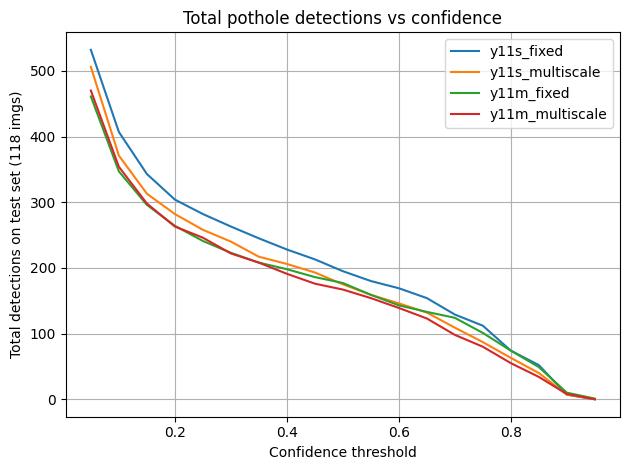

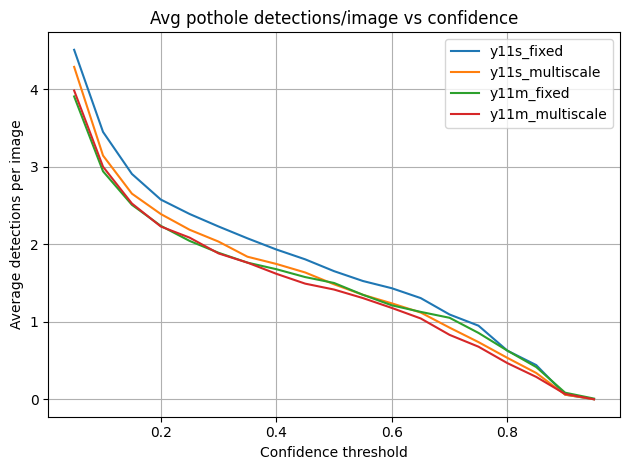

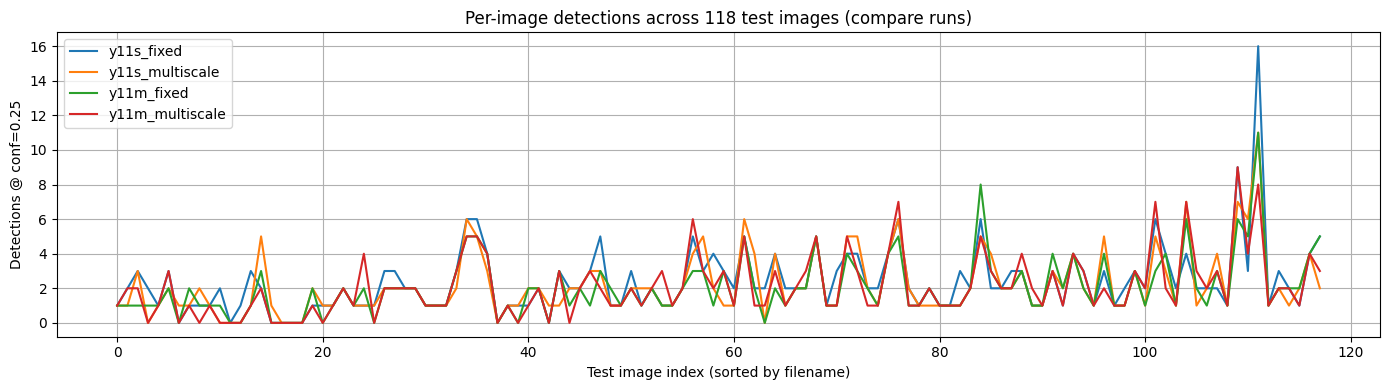


All plots + CSVs saved in: runs_yolo11/conf_sweep_outputs


In [ ]:
# =========================
# CONFIDENCE SWEEP (TEST SET)
# for 4 runs: y11s_fixed, y11s_multiscale, y11m_fixed, y11m_multiscale
# =========================

!pip -q install ultralytics

import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ---- Paths ----
TEST_DIR = Path("pothole_dataset/images/test")   # contains 118 images
assert TEST_DIR.exists(), f"Missing: {TEST_DIR}"

# Your run weights (edit if your paths differ)
RUNS = {
    "y11s_fixed":       "runs_yolo11/pothole_yolo11s_fixed/weights/best.pt",
    "y11s_multiscale":  "runs_yolo11/pothole_yolo11s_multiscale/weights/best.pt",
    "y11m_fixed":       "runs_yolo11/pothole_yolo11m_fixed/weights/best.pt",
    "y11m_multiscale":  "runs_yolo11/pothole_yolo11m_multiscale/weights/best.pt",
}

for k,v in RUNS.items():
    assert Path(v).exists(), f"Missing weights for {k}: {v}"

# ---- Sweep settings ----
imgsz = 640
device = 0
conf_list = [round(x, 2) for x in np.arange(0.05, 1.00, 0.05)]  # 0.05 ... 0.95
iou_nms = 0.7  # you can change
max_det = 300  # enough for potholes
SAVE_DIR = Path("runs_yolo11/conf_sweep_outputs")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# Fixed conf for per-image chart
CONF_FOR_PER_IMAGE = 0.25

# ---- Helper to count detections ----
def count_dets_for_folder(model, conf):
    """
    Runs predict on all test images and returns:
    - total_dets: int
    - per_image: list[int] (len=number of images)
    - image_names: list[str]
    """
    imgs = sorted([p for p in TEST_DIR.iterdir() if p.suffix.lower() in [".jpg",".jpeg",".png"]])
    per_img = []
    names = []

    # stream=True keeps memory low
    results = model.predict(
        source=str(TEST_DIR),
        imgsz=imgsz,
        conf=conf,
        iou=iou_nms,
        device=device,
        save=False,
        stream=True,
        max_det=max_det,
        verbose=False,
    )

    for r in results:
        n = 0 if r.boxes is None else int(r.boxes.shape[0])
        per_img.append(n)
        names.append(Path(r.path).name)

    total = int(np.sum(per_img))
    return total, per_img, names

# ---- Run sweep ----
rows = []
per_image_at_conf = {}  # run_name -> df(image, det_count) for CONF_FOR_PER_IMAGE

for run_name, wpath in RUNS.items():
    print(f"\n=== Loading {run_name} ===")
    model = YOLO(wpath)

    # Sweep
    for conf in conf_list:
        total, per_img, names = count_dets_for_folder(model, conf)
        rows.append({
            "run": run_name,
            "conf": conf,
            "total_detections": total,
            "avg_det_per_image": float(np.mean(per_img)),
            "median_det_per_image": float(np.median(per_img)),
        })
        print(f"{run_name:16s} conf={conf:0.2f}  total={total:5d}  avg/img={np.mean(per_img):0.3f}")

    # Per-image at chosen conf
    total, per_img, names = count_dets_for_folder(model, CONF_FOR_PER_IMAGE)
    df_img = pd.DataFrame({"image": names, f"dets@{CONF_FOR_PER_IMAGE}": per_img}).sort_values("image")
    per_image_at_conf[run_name] = df_img

# ---- Save sweep table ----
df_sweep = pd.DataFrame(rows).sort_values(["run","conf"])
csv_sweep = SAVE_DIR / "conf_sweep_summary.csv"
df_sweep.to_csv(csv_sweep, index=False)
print(f"\nSaved: {csv_sweep}")

# ---- Merge per-image table (118 images) across runs ----
# Start from first run's image ordering
base_run = list(per_image_at_conf.keys())[0]
df_merged = per_image_at_conf[base_run].copy()

for run_name, df_img in per_image_at_conf.items():
    col = f"{run_name}_dets@{CONF_FOR_PER_IMAGE}"
    tmp = df_img.rename(columns={f"dets@{CONF_FOR_PER_IMAGE}": col})
    df_merged = df_merged.merge(tmp[["image", col]], on="image", how="left")

csv_perimg = SAVE_DIR / f"per_image_detections_conf_{CONF_FOR_PER_IMAGE}.csv"
df_merged.to_csv(csv_perimg, index=False)
print(f"Saved: {csv_perimg}")

# =========================
# PLOTS
# =========================

# Plot A: total detections vs conf
plt.figure()
for run_name in RUNS.keys():
    d = df_sweep[df_sweep["run"]==run_name]
    plt.plot(d["conf"], d["total_detections"], label=run_name)
plt.xlabel("Confidence threshold")
plt.ylabel("Total detections on test set (118 imgs)")
plt.title("Total pothole detections vs confidence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(SAVE_DIR / "total_detections_vs_conf.png", dpi=200)
plt.show()

# Plot B: avg detections per image vs conf
plt.figure()
for run_name in RUNS.keys():
    d = df_sweep[df_sweep["run"]==run_name]
    plt.plot(d["conf"], d["avg_det_per_image"], label=run_name)
plt.xlabel("Confidence threshold")
plt.ylabel("Average detections per image")
plt.title("Avg pothole detections/image vs confidence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(SAVE_DIR / "avg_detections_per_image_vs_conf.png", dpi=200)
plt.show()

# Plot C: per-image detected counts (118) at CONF_FOR_PER_IMAGE
# (This is a "spiky" plot but very informative for safety / over-detection.)
plt.figure(figsize=(14,4))
x = np.arange(len(df_merged))
for run_name in RUNS.keys():
    plt.plot(x, df_merged[f"{run_name}_dets@{CONF_FOR_PER_IMAGE}"], label=run_name)
plt.xlabel("Test image index (sorted by filename)")
plt.ylabel(f"Detections @ conf={CONF_FOR_PER_IMAGE}")
plt.title("Per-image detections across 118 test images (compare runs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(SAVE_DIR / f"per_image_detections_conf_{CONF_FOR_PER_IMAGE}.png", dpi=200)
plt.show()

print("\nAll plots + CSVs saved in:", SAVE_DIR)
